# Geopandas 

In [1]:
import os
from datetime import datetime as dt
from time import time

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm, matplotlib.font_manager as fm

In [4]:
import geopandas as gpd
from geopandas import *
from geopandas import GeoDataFrame

In [5]:
import mplleaflet
from mplleaflet import *

In [6]:
%matplotlib inline

In [7]:
geoDF_states = pd.read_pickle(
    "/media/sf_mnlytics/spatial/geodf_statest.pickle")
geoDF_zip5 = pd.read_pickle("/media/sf_mnlytics/spatial/geodf_zipz.pickle")

# Find a zip code and print its shape

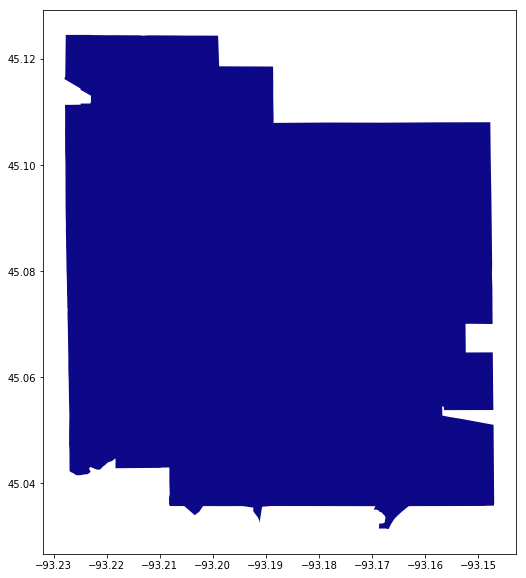

In [8]:
x0 = geoDF_zip5[geoDF_zip5.ZCTA5CE10 == '55112']
x0.plot(figsize=(10,10),cmap=plt.get_cmap("plasma"))

# How geospatial operations can help finding all adjacent zip codes.

In [9]:
r = geoDF_zip5[geoDF_zip5.geometry.touches(x0.iloc[0]['geometry'])]
r1 = r.append(x0)
r1.head(10)

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,state
14365,55126,55126,B5,G6350,S,31059791,5998470,+45.0844497,-093.1328166,"POLYGON ((-93.18654599999999 45.107963, -93.18...",Minnesota
14037,55113,55113,B5,G6350,S,38641889,2196635,+45.0121956,-093.1511859,"POLYGON ((-93.207802 45.020584, -93.20782 45.0...",Minnesota
27036,55449,55449,B5,G6350,S,57869059,246977,+45.1765803,-093.1818576,"POLYGON ((-93.23448399999999 45.189953, -93.23...",Minnesota
25817,55418,55418,B5,G6350,S,17519571,325922,+45.0213178,-093.2428530,"(POLYGON ((-93.26307899999999 45.007471, -93.2...",Minnesota
26104,55421,55421,B5,G6350,S,16251355,869767,+45.0508997,-093.2538333,"POLYGON ((-93.282201 45.06930999999999, -93.28...",Minnesota
26423,55432,55432,B5,G6350,S,25574734,1602770,+45.0967016,-093.2537258,"POLYGON ((-93.28071199999999 45.10601, -93.283...",Minnesota
14036,55112,55112,B5,G6350,S,49217198,5021028,+45.0805060,-093.1920575,"POLYGON ((-93.227734 45.09317799999999, -93.22...",Minnesota


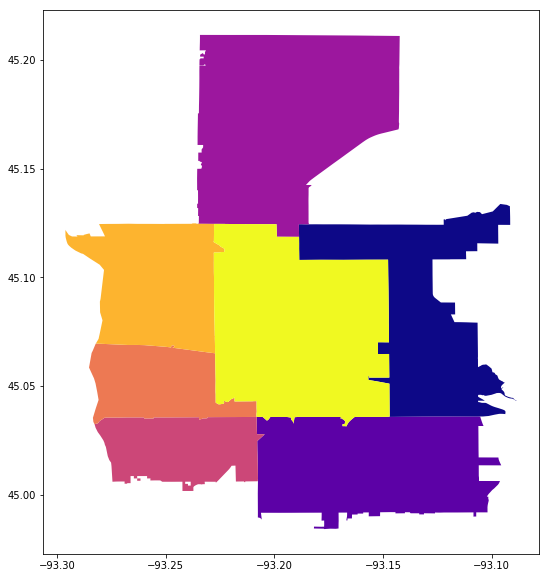

In [10]:
ax = r1.plot(figsize=(10,10),cmap=plt.get_cmap("plasma"))

In [11]:
mplleaflet.display(fig=ax.figure)

# Dissolving all the shapes 

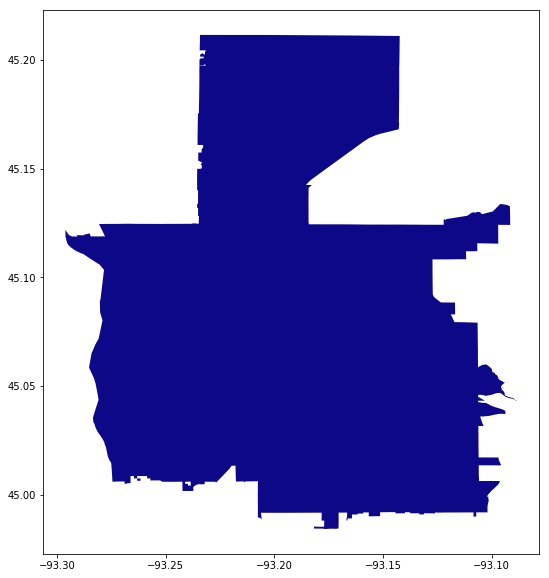

In [12]:
ax = r1.dissolve(by='CLASSFP10').plot(figsize=(10,10),cmap=plt.get_cmap("plasma"));

In [13]:
mplleaflet.display(fig=ax.figure)